In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import pickle
import numpy as np
from os import listdir
from os.path import isfile, join
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

def unpickle_all_data(directory):
    
    # Initialize the variables
    train = dict()
    test = dict()
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    
    # Iterate through all files that we want, train and test
    # Train is separated into batches
    for filename in listdir(directory):
        if isfile(join(directory, filename)):
            
            # The train data
            if 'data_batch' in filename:                
                # Opent the file
                with open(directory + '/' + filename, 'rb') as fo:
                    data = pickle.load(fo, encoding='bytes')

                if 'data' not in train:
                    train['data'] = data[b'data']
                    train['labels'] = np.array(data[b'labels'])
                else:
                    train['data'] = np.concatenate((train['data'], data[b'data']))
                    train['labels'] = np.concatenate((train['labels'], data[b'labels']))
            # The test data
            elif 'test_batch' in filename:                
                # Open the file
                with open(directory + '/' + filename, 'rb') as fo:
                    data = pickle.load(fo, encoding='bytes')
                
                test['data'] = data[b'data']
                test['labels'] = data[b'labels']
    
    # Manipulate the data to the propper format
    for image in train['data']:
        train_x.append(np.transpose(np.reshape(image,(3, 32,32)), (1,2,0)))
    train_y = [label for label in train['labels']]
    
    for image in test['data']:
        test_x.append(np.transpose(np.reshape(image,(3, 32,32)), (1,2,0)))
    test_y = [label for label in test['labels']]
    
    # Transform the data to np array format
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    test_x = np.array(test_x)
    test_y = np.array(test_y)
    
    return (train_x, train_y), (test_x, test_y)

# Run the function with and include the folder where the data are
(x_train, y_train), (x_test, y_test) = unpickle_all_data("/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


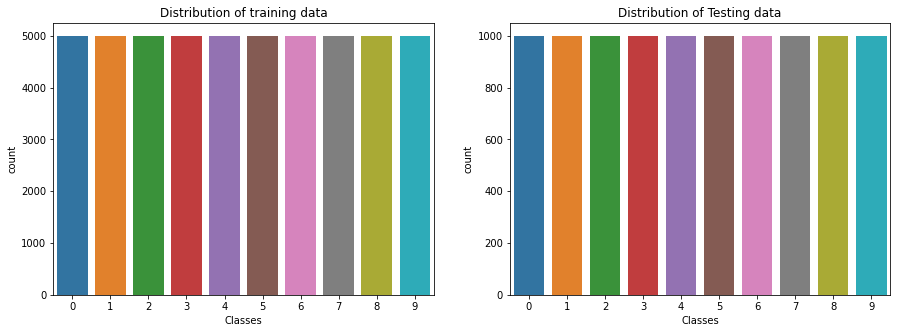

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        9

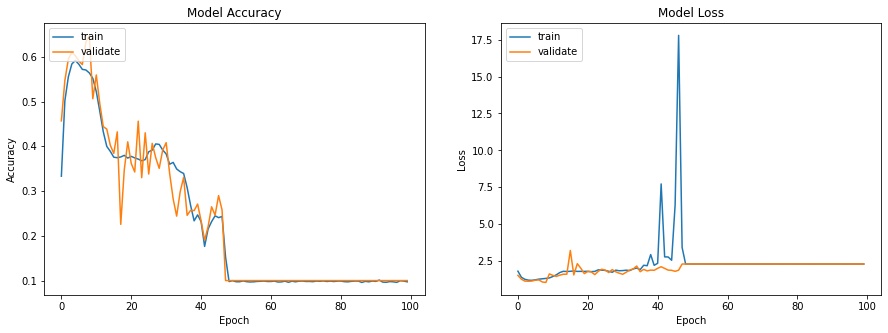

{'loss': [1.8174965381622314, 1.4039493799209595, 1.2682749032974243, 1.2094354629516602, 1.1986262798309326, 1.2342329025268555, 1.2778513431549072, 1.3033703565597534, 1.327893853187561, 1.3603416681289673, 1.4577940702438354, 1.5717278718948364, 1.726075291633606, 1.8100866079330444, 1.7982032299041748, 1.8096668720245361, 1.8337249755859375, 1.803152084350586, 1.8061012029647827, 1.8020057678222656, 1.8104549646377563, 1.7870455980300903, 1.803209900856018, 1.9094715118408203, 1.8869481086730957, 1.8699759244918823, 1.8093987703323364, 1.7440727949142456, 1.887438416481018, 1.8478931188583374, 1.8582154512405396, 1.8846226930618286, 1.8589978218078613, 1.9704656600952148, 2.0319151878356934, 1.923669695854187, 2.218198537826538, 2.1895854473114014, 2.941990613937378, 2.215228319168091, 2.352783679962158, 7.726781368255615, 2.7870752811431885, 2.7798986434936523, 2.558858633041382, 6.309452056884766, 17.788272857666016, 3.4249753952026367, 2.303776502609253, 2.3030309677124023, 2.30

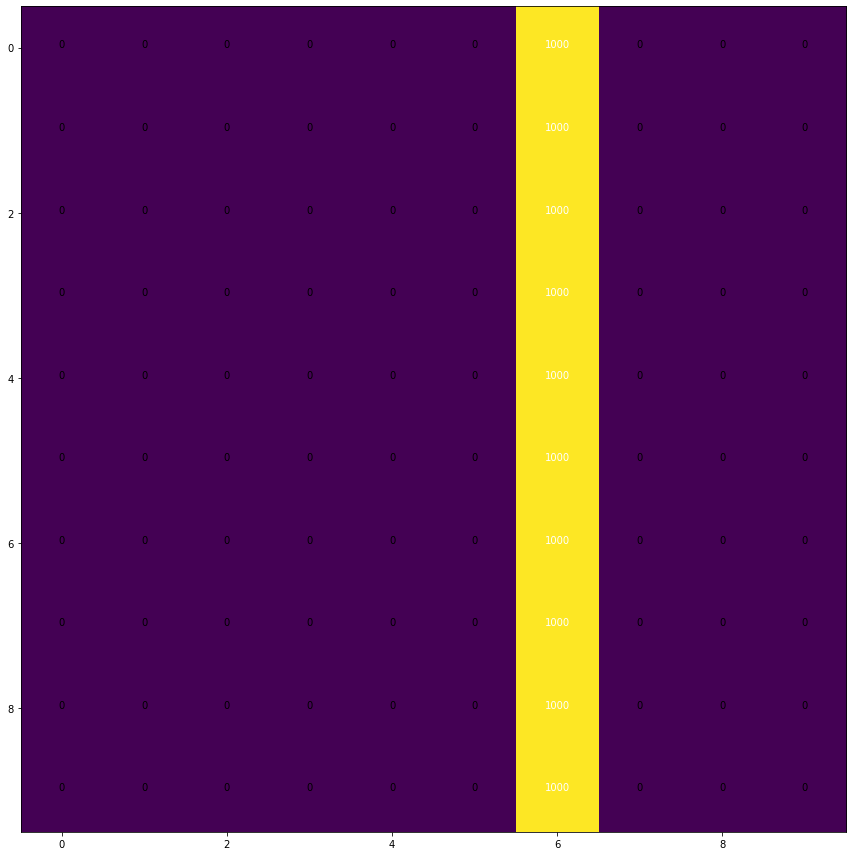

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.10      1.00      0.18      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

1/1 [==============================] - 0s 157ms/step
Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss: 2.302615880

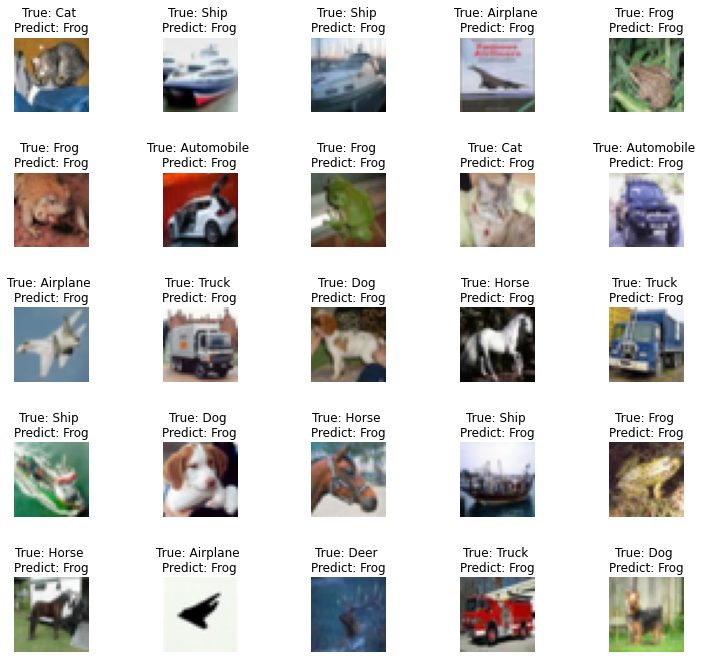

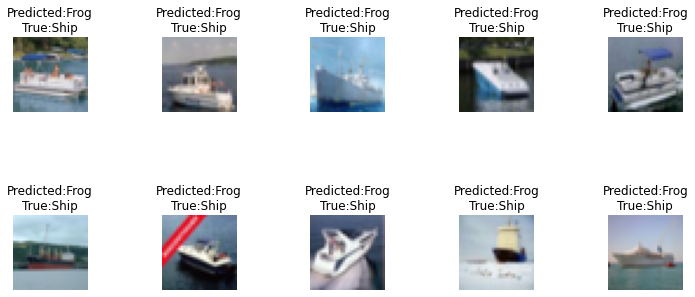

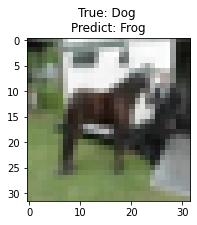

In [4]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False

fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def model_variations(hidden_layer,learning_rate, dropout, **kwargs):

  #define the convnet
  model = Sequential()
  # CONV => RELU => CONV => RELU => POOL => DROPOUT
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  for i in range(hidden_layer):
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))

  # CONV => RELU => CONV => RELU => POOL => DROPOUT
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  for i in range(hidden_layer):
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))

  # FLATTERN => DENSE => RELU => DROPOUT
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5)) 
  # a softmax classifier
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.summary()

  # initiate RMSprop optimizer
  opt = keras.optimizers.RMSprop(learning_rate, decay=1e-6)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                
                metrics=['accuracy'])


  history = None  # For recording the history of trainning process.
  print(epochs)
  if not data_augmentation:
      print('Not using data augmentation.')
      history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)
            
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:

      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for feature-wise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      history = model.fit_generator(datagen.flow(x_train, y_train,
                                      batch_size=batch_size),
                                      epochs=epochs,
                                      validation_data=(x_test, y_test),
                                      workers=4)


  fig, axs = plt.subplots(1,2,figsize=(15,5)) 
  # summarize history for accuracy
  axs[0].plot(history.history['accuracy']) 
  axs[0].plot(history.history['val_accuracy']) 
  axs[0].set_title('Model Accuracy')
  axs[0].set_ylabel('Accuracy') 
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['train', 'validate'], loc='upper left')
  # summarize history for loss
  axs[1].plot(history.history['loss']) 
  axs[1].plot(history.history['val_loss']) 
  axs[1].set_title('Model Loss')
  axs[1].set_ylabel('Loss') 
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['train', 'validate'], loc='upper left')
  plt.show()

  # list all data in history
  print(history.history)

  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])

  # make prediction.
  pred = model.predict(x_test)

  row_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
  col_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

  fig, ax = plt.subplots(figsize=(12,12))

  cbar_kw = plt.cm.Blues

  cbarlabel="count of predictions"

  # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(pred, axis=1) 
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(y_test, axis=1)

  data = confusion_matrix(Y_true, Y_pred_classes) 
  """
  A function to annotate a heatmap.
  """
   # Plot the heatmap
  im = ax.imshow(data, **kwargs)
  # Change the text's color depending on the data.
  texts = []
  for i in range(data.shape[0]):
      for j in range(data.shape[1]):
          text = im.axes.text(j, i, format(data[i, j], "d"), horizontalalignment="center",color="white" if data[i, j] > data.max()/2. else "black")
          texts.append(text)

 
  # Errors are difference between predicted labels and true labels
  errors = (Y_pred_classes - Y_true != 0)

  Y_pred_classes_errors = Y_pred_classes[errors]
  Y_pred_errors = pred[errors]
  Y_true_errors = Y_true[errors]
  X_test_errors = x_test[errors]

  cm = confusion_matrix(Y_true, Y_pred_classes) 
  thresh = cm.max() / 2.

  fig.tight_layout()
  plt.show()

  """
  Create a heatmap from a numpy array and two lists of labels.
  """
  if not ax:
      ax = plt.gca()

 
  cbar_kw={}
  # Create colorbar
  cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
  cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

  # Let the horizontal axes labeling appear on top.
  ax.tick_params(top=True, bottom=False,
                labeltop=True, labelbottom=False)
  # We want to show all ticks...
  ax.set_xticks(np.arange(data.shape[1]))
  ax.set_yticks(np.arange(data.shape[0]))
  # ... and label them with the respective list entries.
  ax.set_xticklabels(col_labels)
  ax.set_yticklabels(row_labels)

  ax.set_xlabel('Predicted Label') 
  ax.set_ylabel('True Label')

  data = cm
  threshold = thresh

  print(classification_report(Y_true, Y_pred_classes))

  R = 5
  C = 5
  fig, axes = plt.subplots(R, C, figsize=(12,12))
  axes = axes.ravel()
  labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
  for i in np.arange(0, R*C):
      axes[i].imshow(x_test[i])
      axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
      axes[i].axis('off')
      plt.subplots_adjust(wspace=1)

  # Probabilities of the wrong predicted numbers
  Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

  # Predicted probabilities of the true values in the error set
  true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

  # Difference between the probability of the predicted label and the true label
  delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

  # Sorted list of the delta prob errors
  sorted_dela_errors = np.argsort(delta_pred_true_errors)

  # Top 10 errors 
  most_important_errors = sorted_dela_errors[-10:]

  """ This function shows 10 images with their predicted and real labels"""
  n = 0
  nrows = 2
  ncols = 5
  fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(12,6))
  for row in range(nrows):
      for col in range(ncols):
          error = most_important_errors[n]
          ax[row,col].imshow((X_test_errors[error]).reshape((32,32,3)))
          ax[row,col].set_title("Predicted:{}\nTrue:{}".
                                format(labels[Y_pred_classes_errors[error]],labels[Y_true_errors[error]]))
          n += 1
          ax[row,col].axis('off')
          plt.subplots_adjust(wspace=1)



  fig = plt.figure(figsize = (3,3))
  test_image = np.expand_dims(x_test[20], axis=0)
  test_result = model.predict(test_image)
  plt.imshow(x_test[20])
  dict_key = test_result[0]
  plt.title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
  
  save_dir = os.path.join(os.getcwd(), 'saved_models')
  model_name = 'keras_cifar10_trained_model.h5'

  # Save model and weights
  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])

#model with 4 hidden layers, learning rate is 0.001 and dropout is 0.25
model_variations(3,0.001,0.25)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)       

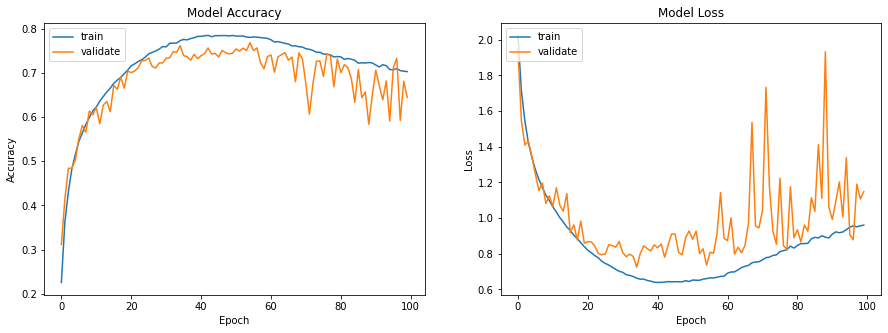

{'loss': [2.0242323875427246, 1.71243155002594, 1.542986512184143, 1.4224257469177246, 1.3402234315872192, 1.2717161178588867, 1.2166416645050049, 1.171800971031189, 1.1284695863723755, 1.0980188846588135, 1.0631368160247803, 1.0340057611465454, 1.0023412704467773, 0.9778710007667542, 0.9499695897102356, 0.9306265711784363, 0.9043013453483582, 0.8849110007286072, 0.8617132902145386, 0.8401572704315186, 0.819958508014679, 0.806018054485321, 0.7898778319358826, 0.7775213122367859, 0.7577941417694092, 0.7461341619491577, 0.7367289066314697, 0.7247026562690735, 0.7126367092132568, 0.7017349004745483, 0.6958752274513245, 0.6828112006187439, 0.6788375973701477, 0.672694206237793, 0.663556694984436, 0.6576715707778931, 0.6578924059867859, 0.6506568193435669, 0.6467207074165344, 0.6406516432762146, 0.6392836570739746, 0.6399762034416199, 0.6413059234619141, 0.6439964175224304, 0.6428734064102173, 0.6434234976768494, 0.6431617736816406, 0.6423838138580322, 0.6492303609848022, 0.6444351673126221

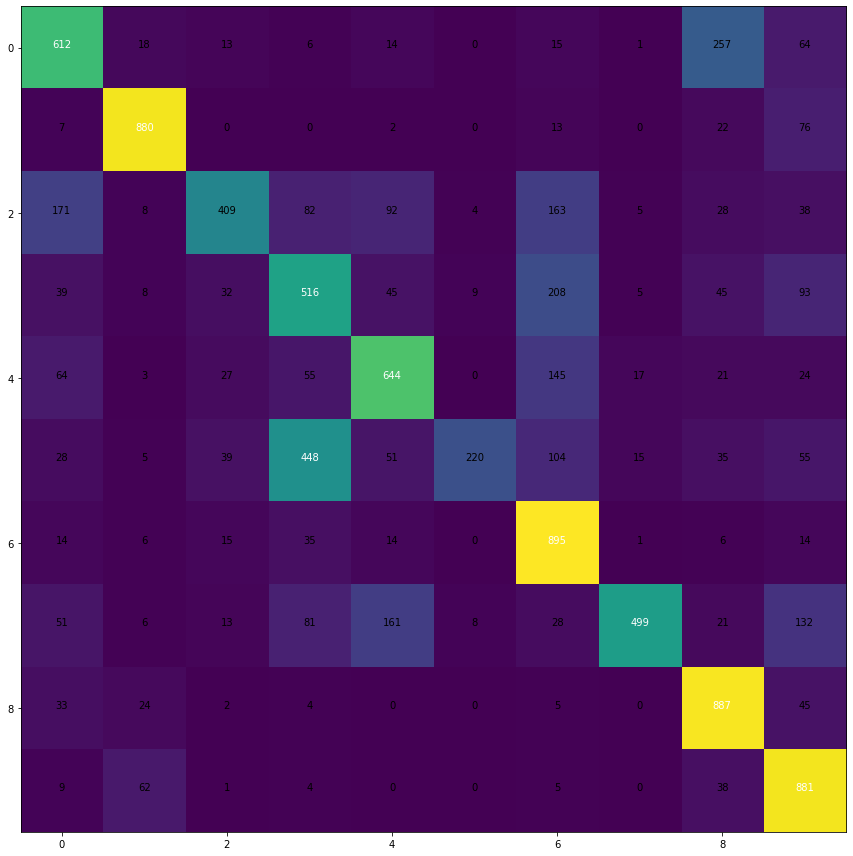

              precision    recall  f1-score   support

           0       0.60      0.61      0.60      1000
           1       0.86      0.88      0.87      1000
           2       0.74      0.41      0.53      1000
           3       0.42      0.52      0.46      1000
           4       0.63      0.64      0.64      1000
           5       0.91      0.22      0.35      1000
           6       0.57      0.90      0.69      1000
           7       0.92      0.50      0.65      1000
           8       0.65      0.89      0.75      1000
           9       0.62      0.88      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.69      0.64      0.63     10000
weighted avg       0.69      0.64      0.63     10000

1/1 [==============================] - 0s 74ms/step
Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 1s 4ms/step - loss: 1.1482 - accuracy: 0.6443
Test loss: 1.1481628417

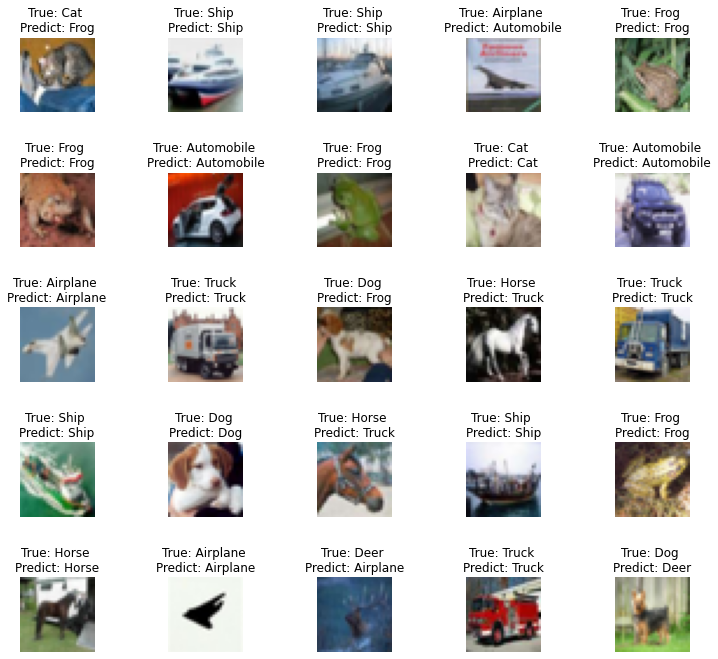

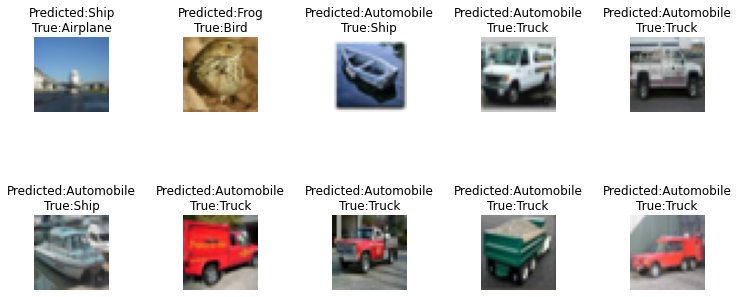

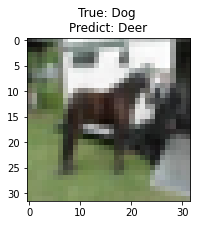

In [5]:
#model with 5 hidden layer, learning rate 0.0001 and dropout 0.3
model_variations(4,0.0001,0.3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_22 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_23 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_24 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 32)       

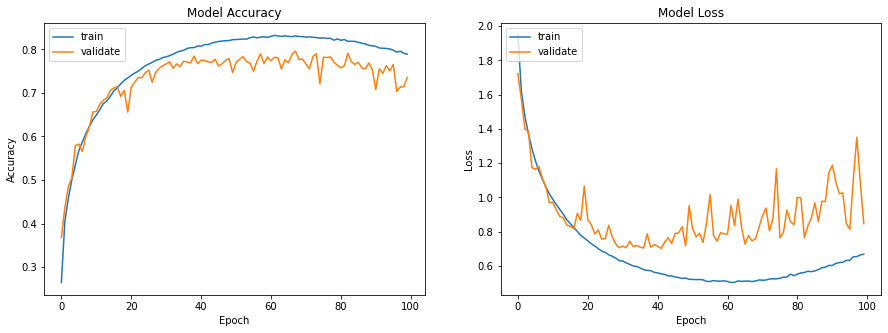

{'loss': [1.9459394216537476, 1.6170686483383179, 1.4741026163101196, 1.3717470169067383, 1.2853286266326904, 1.2135517597198486, 1.154515266418457, 1.1068315505981445, 1.0607529878616333, 1.0196303129196167, 0.987533688545227, 0.9572909474372864, 0.9285532236099243, 0.9010679125785828, 0.8692779541015625, 0.8461615443229675, 0.823521077632904, 0.8011214733123779, 0.7778154015541077, 0.762347400188446, 0.7460206747055054, 0.7284713387489319, 0.716083288192749, 0.69988614320755, 0.686086118221283, 0.6784994006156921, 0.6643558740615845, 0.6561408638954163, 0.6450490951538086, 0.6301025748252869, 0.6279235482215881, 0.6171131730079651, 0.6084902882575989, 0.5989925265312195, 0.5963746309280396, 0.5871946215629578, 0.5776316523551941, 0.5732331871986389, 0.5717734098434448, 0.5618034601211548, 0.5590924024581909, 0.5525009036064148, 0.5498804450035095, 0.5414189696311951, 0.5406159162521362, 0.5347948670387268, 0.5315051674842834, 0.5262168645858765, 0.5283581018447876, 0.5214298963546753

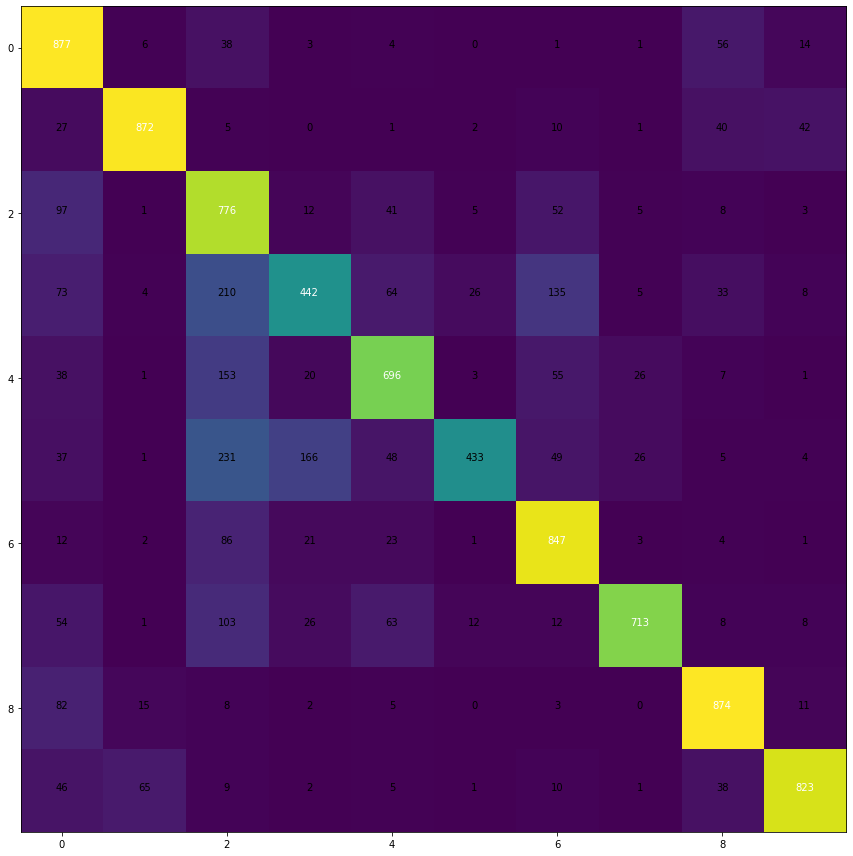

              precision    recall  f1-score   support

           0       0.65      0.88      0.75      1000
           1       0.90      0.87      0.89      1000
           2       0.48      0.78      0.59      1000
           3       0.64      0.44      0.52      1000
           4       0.73      0.70      0.71      1000
           5       0.90      0.43      0.58      1000
           6       0.72      0.85      0.78      1000
           7       0.91      0.71      0.80      1000
           8       0.81      0.87      0.84      1000
           9       0.90      0.82      0.86      1000

    accuracy                           0.74     10000
   macro avg       0.76      0.74      0.73     10000
weighted avg       0.76      0.74      0.73     10000

1/1 [==============================] - 0s 16ms/step
Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 1s 4ms/step - loss: 0.8462 - accuracy: 0.7353
Test loss: 0.8461643457

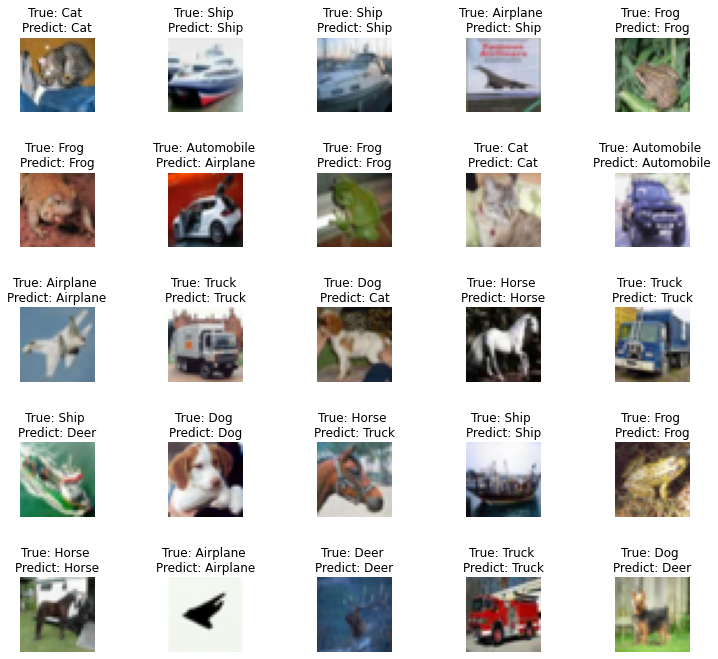

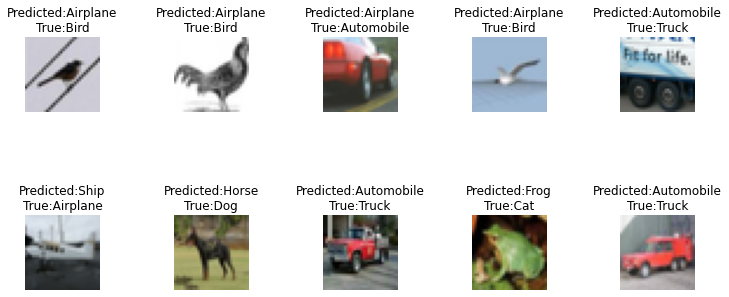

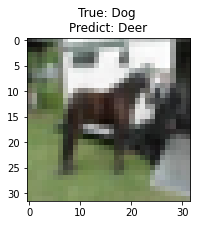

In [6]:
#model with no drop out and 4 hidden layer, learning rate 0.0001 and dropout 0.2
model_variations(3,0.0001,0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_32 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_33 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_34 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 26, 26, 32)       

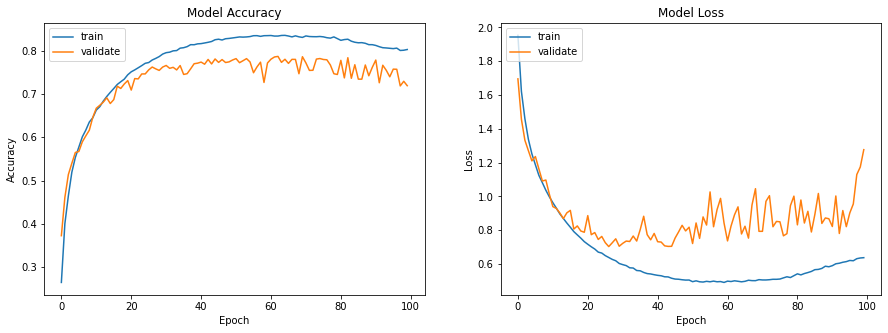

{'loss': [1.9532679319381714, 1.621688723564148, 1.459360957145691, 1.3377469778060913, 1.2519047260284424, 1.1875994205474854, 1.124896764755249, 1.081263542175293, 1.0365039110183716, 0.9978082776069641, 0.9631953239440918, 0.9308481216430664, 0.8969840407371521, 0.8698031902313232, 0.8429225087165833, 0.8180128335952759, 0.7919749021530151, 0.7726165652275085, 0.7535085678100586, 0.7326174974441528, 0.7170500755310059, 0.7022271752357483, 0.688729465007782, 0.6705240607261658, 0.6649653911590576, 0.6499810814857483, 0.6388348937034607, 0.6275863647460938, 0.6194736957550049, 0.6032974123954773, 0.5965537428855896, 0.5907508134841919, 0.5777793526649475, 0.5764058232307434, 0.56179279088974, 0.560127854347229, 0.5503280162811279, 0.5436055660247803, 0.5413209199905396, 0.5368931889533997, 0.5331411361694336, 0.5306832194328308, 0.5246249437332153, 0.523901104927063, 0.5158993601799011, 0.511135458946228, 0.5100356936454773, 0.507086455821991, 0.505077064037323, 0.5054117441177368, 0.

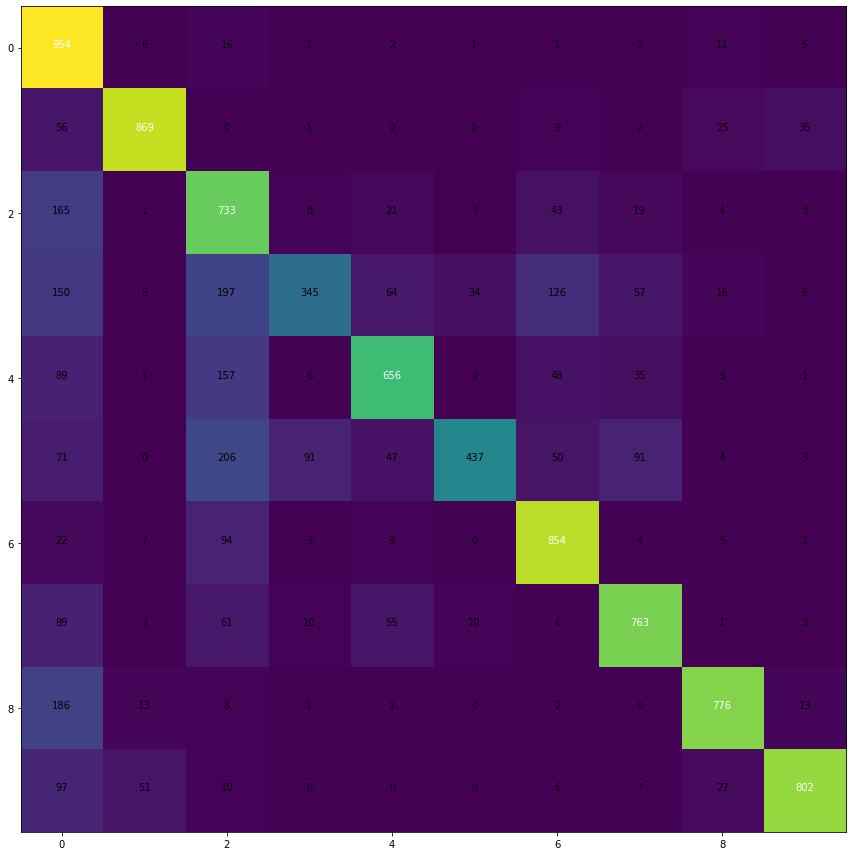

              precision    recall  f1-score   support

           0       0.51      0.95      0.66      1000
           1       0.91      0.87      0.89      1000
           2       0.49      0.73      0.59      1000
           3       0.74      0.34      0.47      1000
           4       0.77      0.66      0.71      1000
           5       0.90      0.44      0.59      1000
           6       0.75      0.85      0.80      1000
           7       0.78      0.76      0.77      1000
           8       0.89      0.78      0.83      1000
           9       0.92      0.80      0.86      1000

    accuracy                           0.72     10000
   macro avg       0.76      0.72      0.72     10000
weighted avg       0.76      0.72      0.72     10000

1/1 [==============================] - 0s 16ms/step
Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 1s 4ms/step - loss: 1.2768 - accuracy: 0.7189
Test loss: 1.2768400907

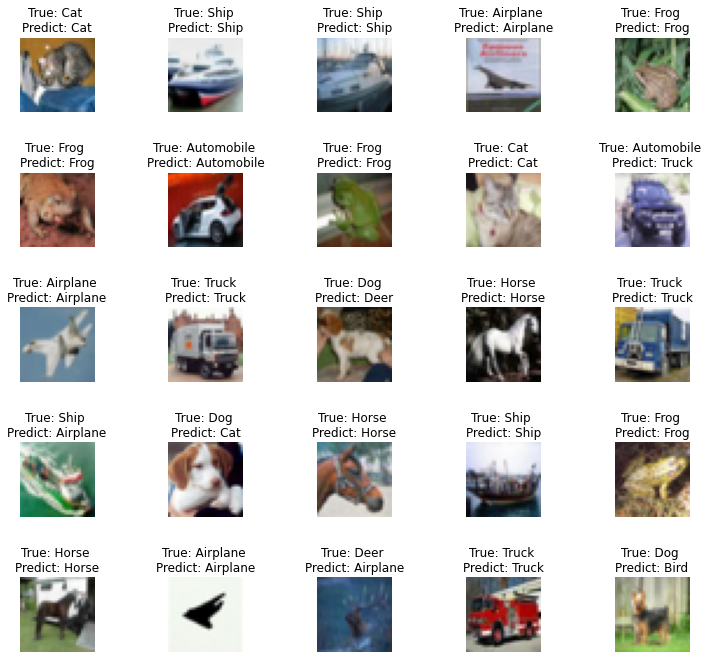

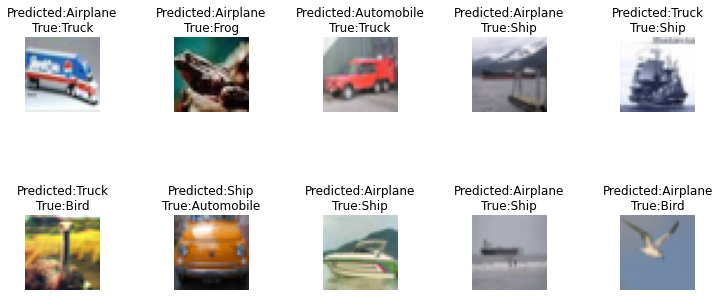

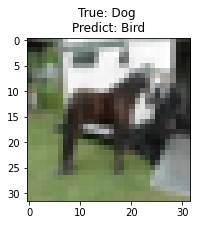

In [7]:
#model with 4 hidden layers, learning rate is 0.001 and dropout is 0.25
model_variations(3,0.0001,0.15)